In [1]:
# Thanks Toby!

In [2]:
import lane_detection
import lane_following
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

In [4]:
frequency = 300
count = 0

 got a frame 
[0, 0, 475.191333938035, 0, 873.6691235348326, 1080]
the auv should go right


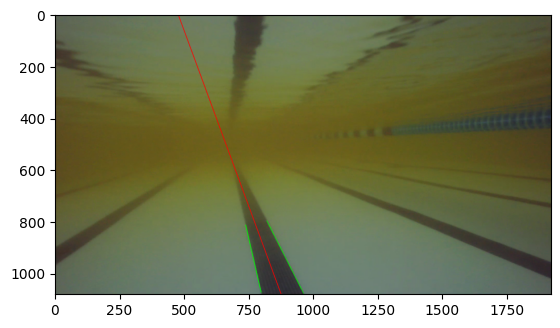

 got a frame 
[0, 0, 926.7452371374418, 0, 745.6870132914148, 1080]
the auv should go left


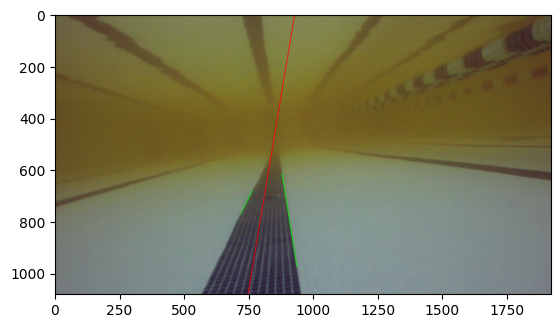

 got a frame 
[0, 0, 891.3995151366738, 0, -404.5293440248147, 1080]
the auv should go left


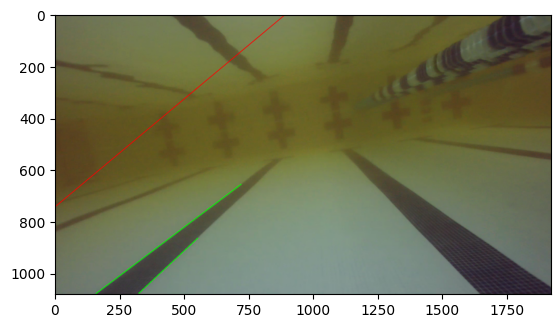

 got a frame 
[0, 0, 870.2882512247153, 0, 413.0063103765605, 1080]
the auv should go left


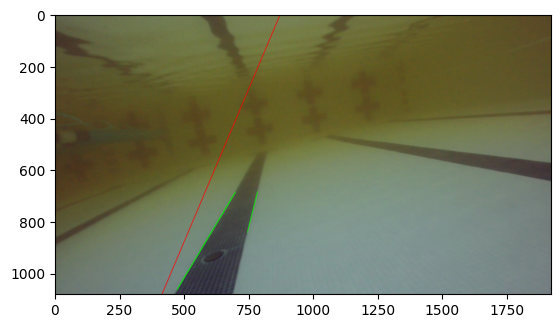

 got a frame 
[0, 0, 2935.8632093198044, 0, 366.5509207065013, 1080]
the auv should go left


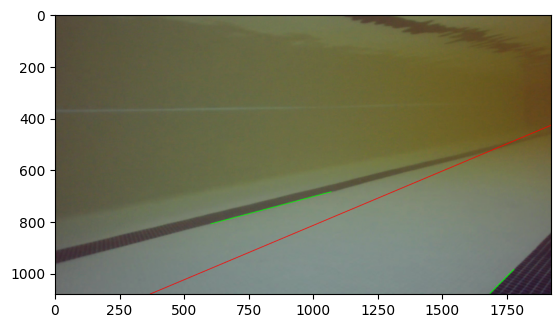

 got a frame 
[0, 0, 0, 0, 0, 0]
the auv should go forward


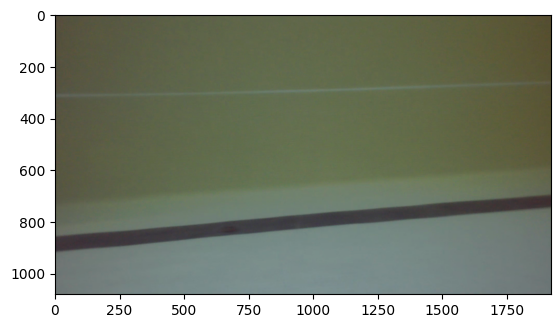

 got a frame 
[0, 0, 2516.225768323579, 0, -150.05183504065437, 1080]
the auv should go left


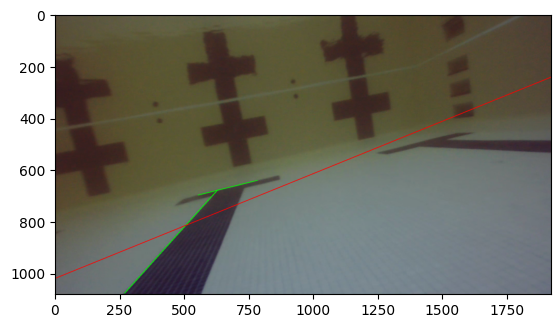

 got a frame 
[0, 0, 1458.2634241101377, 0, 1560.1268675428882, 1080]
the auv should go right


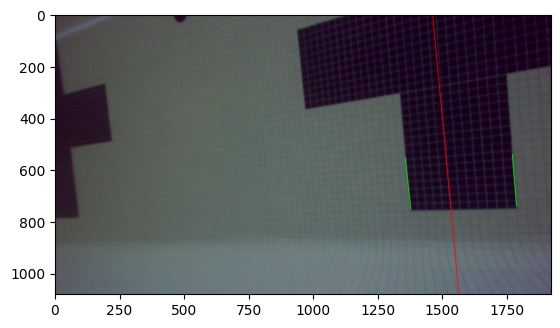

In [5]:
while True:
    ret, frame = vcap.read()

    if not ret:
        break

    if count % frequency == 0:
        screen_height = 1080 #frame.shape[0] # bad code, idc
        screen_width = 1920 #frame.shape[1]

        # got a frame, close the cap and return the frame
        print(" got a frame ")
        gray = lane_detection.proccess_img(frame)
        lines = lane_detection.detect_lines(gray, 50, 50, 3, 50, 50)
        lanes = lane_detection.detect_lanes(lines, screen_height=screen_height)
        laned_img = lane_detection.draw_lanes(frame, lanes)

        #for lane in lanes: # get and draw lane centers!
        (center, slope) = lane_following.get_lane_center(lanes)

        print(lane_following.get_center_line(center, slope, screen_height=screen_height))

        print(f"the auv should go {lane_following.recommend_direction(center, slope, screen_width / 2, lanes)}")
        
        final_img = lane_following.draw_center(laned_img, lane_following.get_center_line(center, slope, screen_height=screen_height))

        plt.imshow(final_img)
        plt.show()
        
        # img = frame
        #vcap.release()

    count += 1